<a href="https://colab.research.google.com/github/Kari-Mesa/Vanti/blob/main/Vanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import requests
repo_owner = "Kari-Mesa"
repo_name = "Vanti"
file_path = "data_challenge.csv"
branch = "main"
file_path_municipio="Departamentos_y_municipios_de_Colombia_20240624.csv"
# Construct the raw file URL
raw_url = f"https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}"

# Download the CSV data from GitHub
response = requests.get(raw_url)

# Check if the request was successful
if response.status_code == 200:
   # Use StringIO to create a file-like object from the response content
    from io import StringIO
    df = pd.read_csv(StringIO(response.text))
    print(df.head())  # Print the first few rows of the DataFrame
else:
    print("Failed to download the file.")

                     cuenta fec_contab_documento  consumo  categoria_cliente  \
0  AATHHM6d7TyIT1ubMnB14A==           2023-04-22      0.0                 60   
1  AATHHM6d7TyIT1ubMnB14A==           2023-05-23      0.0                 60   
2  AATHHM6d7TyIT1ubMnB14A==           2023-06-23      0.0                 60   
3  AATHHM6d7TyIT1ubMnB14A==           2023-07-22      0.0                 60   
4  AATHHM6d7TyIT1ubMnB14A==           2023-08-23      0.0                 60   

  porcion  dias_fact descrip_poblac_suministro  
0     P14         33                    BOGOTA  
1     P14         27                    BOGOTA  
2     P14         33                    BOGOTA  
3     P14         27                    BOGOTA  
4     P14         29                    BOGOTA  


In [21]:
df.count()

cuenta                       108895
fec_contab_documento         108895
consumo                      108895
categoria_cliente            108895
porcion                      100973
dias_fact                    108895
descrip_poblac_suministro    108895
dtype: int64

In [22]:
# Download Municipios data
# Construct the raw file URL
raw_url = f"https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path_municipio}"

# Download the CSV data from GitHub
response = requests.get(raw_url)
if response.status_code == 200:
   # Use StringIO to create a file-like object from the response content
    from io import StringIO
    df_municipios = pd.read_csv(StringIO(response.text))
    print(df_municipios.head())  # Print the first few rows of the DataFrame
else:
    print("Failed to download the file.")


                            REGION  CÓDIGO DANE DEL DEPARTAMENTO DEPARTAMENTO  \
0  Región Eje Cafetero - Antioquia                             5    Antioquia   
1  Región Eje Cafetero - Antioquia                             5    Antioquia   
2  Región Eje Cafetero - Antioquia                             5    Antioquia   
3  Región Eje Cafetero - Antioquia                             5    Antioquia   
4  Región Eje Cafetero - Antioquia                             5    Antioquia   

   CÓDIGO DANE DEL MUNICIPIO   MUNICIPIO  
0                      5.001    Medellín  
1                      5.002   Abejorral  
2                      5.004    Abriaquí  
3                      5.021  Alejandría  
4                      5.030       Amagá  


In [10]:
!pip install unidecode
import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [23]:
df_municipios['CÓDIGO DANE DEL MUNICIPIO'] = (df_municipios['CÓDIGO DANE DEL MUNICIPIO'] * 1000).astype(int)
def remove_accents_from_string(text):
    #This function now takes a string as input and returns the de-accented string.
    new_text = unidecode.unidecode(text)
    return new_text
df_municipios['Municipios_sa'] = df_municipios['MUNICIPIO'].apply(remove_accents_from_string)
print(df_municipios.head())

                            REGION  CÓDIGO DANE DEL DEPARTAMENTO DEPARTAMENTO  \
0  Región Eje Cafetero - Antioquia                             5    Antioquia   
1  Región Eje Cafetero - Antioquia                             5    Antioquia   
2  Región Eje Cafetero - Antioquia                             5    Antioquia   
3  Región Eje Cafetero - Antioquia                             5    Antioquia   
4  Región Eje Cafetero - Antioquia                             5    Antioquia   

   CÓDIGO DANE DEL MUNICIPIO   MUNICIPIO Municipios_sa  
0                       5001    Medellín      Medellin  
1                       5002   Abejorral     Abejorral  
2                       5004    Abriaquí      Abriaqui  
3                       5021  Alejandría    Alejandria  
4                       5030       Amagá         Amaga  


In [24]:
## Cleaning Tasks
# Update Bogota to 'Bogotá D.C.'
df_municipios.loc[df_municipios['Municipios_sa'] == 'Bogota D.C.'] = 'Bogota'

In [88]:
# Adding department
df = df.merge(df_municipios[['MUNICIPIO' ,'DEPARTAMENTO']],
               left_on=df['descrip_poblac_suministro'].str.lower(), right_on=df_municipios['Municipios_sa'].str.lower(),
               how='left')
print(df.head())

    key_0                    cuenta fec_contab_documento  consumo  \
0  bogota  AATHHM6d7TyIT1ubMnB14A==           2023-04-22      0.0   
1  bogota  AATHHM6d7TyIT1ubMnB14A==           2023-05-23      0.0   
2  bogota  AATHHM6d7TyIT1ubMnB14A==           2023-06-23      0.0   
3  bogota  AATHHM6d7TyIT1ubMnB14A==           2023-07-22      0.0   
4  bogota  AATHHM6d7TyIT1ubMnB14A==           2023-08-23      0.0   

   categoria_cliente porcion  dias_fact descrip_poblac_suministro MUNICIPIO  \
0                 60     P14         33                    BOGOTA    Bogota   
1                 60     P14         27                    BOGOTA    Bogota   
2                 60     P14         33                    BOGOTA    Bogota   
3                 60     P14         27                    BOGOTA    Bogota   
4                 60     P14         29                    BOGOTA    Bogota   

  DEPARTAMENTO  
0       Bogota  
1       Bogota  
2       Bogota  
3       Bogota  
4       Bogota  


In [89]:
##Delete records with duplicate municipios
#Los siguientes municipios estan presentes en mas de un departamento se borran dsonde se consiera que Vanti no tiene presencia.
#Albania	Belén	Briceño	Mosquera	San Martín

condition = (df['DEPARTAMENTO'] == 'La Guajira') & (df['MUNICIPIO'] == 'Albania') # Calculate boolean condition
df.drop(df[condition].index, inplace = True) # Use boolean condition to filter and drop

#110.395 after # 110.381

In [90]:
condition = (df['DEPARTAMENTO'] == 'Caquetá') & (df['MUNICIPIO'] == 'Albania') # Calculate boolean condition
df.drop(df[condition].index, inplace = True) # Use boolean condition to filter and drop

#110.395 after # 110.367

In [91]:
condition = (df['DEPARTAMENTO'] == 'Nariño') & (df['MUNICIPIO'] == 'Belén') # Calculate boolean condition
df.drop(df[condition].index, inplace = True) # Use boolean condition to filter and drop

#110.367 after # 110.311

In [92]:
condition = (df['DEPARTAMENTO'] == 'Antioquia') & (df['MUNICIPIO'] == 'Briceño') # Calculate boolean condition
df.drop(df[condition].index, inplace = True) # Use boolean condition to filter and drop

#110.311 after # 110.297

In [93]:
condition = (df['DEPARTAMENTO'] == 'Nariño') & (df['MUNICIPIO'] == 'Mosquera') # Calculate boolean condition
df.drop(df[condition].index, inplace = True) # Use boolean condition to filter and drop

#110.297 after #  109.007

In [94]:
condition = (df['DEPARTAMENTO'] == 'Meta') & (df['MUNICIPIO'] == 'San Martín') # Calculate boolean condition
df.drop(df[condition].index, inplace = True) # Use boolean condition to filter and drop

#109.007 after # 108.895

In [95]:
df.count()

key_0                        108895
cuenta                       108895
fec_contab_documento         108895
consumo                      108895
categoria_cliente            108895
porcion                      100973
dias_fact                    108895
descrip_poblac_suministro    108895
MUNICIPIO                    107621
DEPARTAMENTO                 107621
dtype: int64

In [96]:
df.loc[df['descrip_poblac_suministro'] == 'LA JAGUA DE IBIRIC', 'MUNICIPIO'] = 'La Jagua de Ibirico'
df.loc[df['descrip_poblac_suministro'] == 'LA JAGUA DE IBIRIC', 'DEPARTAMENTO'] = 'Cesar'

In [97]:
df.loc[df['descrip_poblac_suministro'] == 'UBATE', 'MUNICIPIO'] = 'Villa de San Diego de Ubate'
df.loc[df['descrip_poblac_suministro'] == 'UBATE', 'DEPARTAMENTO'] = 'Cundinamarca'

In [98]:
df.loc[df['descrip_poblac_suministro'] == 'S DE TORRES', 'MUNICIPIO'] = 'Sabana de Torres'
df.loc[df['descrip_poblac_suministro'] == 'S DE TORRES', 'DEPARTAMENTO'] = 'Santander'

In [99]:
df.loc[df['descrip_poblac_suministro'] == 'S. ROSA DE VITERBO', 'MUNICIPIO'] = 'Santa Rosa de Viterbo'
df.loc[df['descrip_poblac_suministro'] == 'S. ROSA DE VITERBO', 'DEPARTAMENTO'] = 'Boyacá'

In [155]:
df_municipios

,REGION,CÓDIGO DANE DEL DEPARTAMENTO,DEPARTAMENTO,CÓDIGO DANE DEL MUNICIPIO,MUNICIPIO,Mucicipios_na
0,Región Eje Cafetero - Antioquia,5,Antioquia,5001,Medellín,Medellin
1,Región Eje Cafetero - Antioquia,5,Antioquia,5002,Abejorral,Abejorral
2,Región Eje Cafetero - Antioquia,5,Antioquia,5004,Abriaquí,Abriaqui
3,Región Eje Cafetero - Antioquia,5,Antioquia,5021,Alejandría,Alejandria
4,Región Eje Cafetero - Antioquia,5,Antioquia,5030,Amagá,Amaga
...,...,...,...,...,...,...
1118,Región Eje Cafetero - Antioquia,17,Caldas,17444,Marquetalia,Marquetalia
1119,Región Pacífico,52,Nariño,52051,Arboleda,Arboleda
1120,Región Pacífico,76,Valle del Cauca,76109,Buenaventura,Buenaventura
1121,Región Caribe,47,Magdalena,47189,Ciénaga,Cienaga


In [154]:
df_null_municipios.descrip_poblac_suministro.value_counts()

descrip_poblac_suministro
UBATE                 302
LA JAGUA DE IBIRIC    295
S DE TORRES           262
B-MANGA VEREDAL        81
RINCON HONDO           78
CASACARA               56
S. ROSA DE VITERBO     42
PTE.SOGAMOSO           42
EL PEDRAL              42
EL LLANITO             28
NAZARETH               28
LAS PALMITAS           14
GUATANCUY-RURAL         4
Name: count, dtype: int64

In [101]:
df_null_municipios = df[df['MUNICIPIO'].isnull()]
df_null_municipios.descrip_poblac_suministro.value_counts()
#df_null_municipios

descrip_poblac_suministro
B-MANGA VEREDAL    81
RINCON HONDO       78
CASACARA           56
PTE.SOGAMOSO       42
EL PEDRAL          42
EL LLANITO         28
NAZARETH           28
LAS PALMITAS       14
GUATANCUY-RURAL     4
Name: count, dtype: int64

In [102]:
#with pd.option_context('display.max_rows', None):
 #   display(Grupos)
Grupos=df.groupby(['DEPARTAMENTO', 'MUNICIPIO']).size()
grouped_df = Grupos.reset_index(name='Count')
grouped_df.to_excel('grouped_data.xlsx', index=False)

In [103]:
with pd.option_context('display.max_rows', None):
   display(grouped_df)

,DEPARTAMENTO,MUNICIPIO,Count
0,Antioquia,San Roque,34
1,Antioquia,Yondó,28
2,Atlántico,Sabanagrande,14
3,Bogota,Bogota,68308
4,Bolívar,Cantagallo,38
5,Boyacá,Belén,56
6,Boyacá,Briceño,14
7,Boyacá,Cerinza,28
8,Boyacá,Chiquinquirá,435
9,Boyacá,Cómbita,28


In [104]:
grouped_data = df.groupby(['DEPARTAMENTO', 'MUNICIPIO'])

# Example operations you can perform on the grouped data:
# 1. Count the number of records in each group
counts = grouped_data.size()
print(counts)



# 3. Get a summary of descriptive statistics for each group
summary = grouped_data.describe()
print(summary)

DEPARTAMENTO  MUNICIPIO       
Antioquia     San Roque              34
              Yondó                  28
Atlántico     Sabanagrande           14
Bogota        Bogota              68308
Bolívar       Cantagallo             38
                                  ...  
Santander     La Belleza             28
              Lebríja               210
              Piedecuesta          1396
              Puerto Wilches        212
              Sabana de Torres      262
Length: 84, dtype: int64
DEPARTAMENTO  MUNICIPIO       
Antioquia     San Roque           10.676471
              Yondó                7.714286
Atlántico     Sabanagrande        12.214286
Bogota        Bogota              27.948161
Bolívar       Cantagallo          11.368421
                                    ...    
Santander     La Belleza          17.642857
              Lebríja             13.923810
              Piedecuesta         16.557307
              Puerto Wilches      14.754717
              Sabana de Torres   

In [118]:
with pd.option_context('display.max_rows', None):
   display(mean_consumo)

# 2. Calculate the mean of consumo
mean_consumo = grouped_data['consumo'].mean()
print(mean_consumo)

DEPARTAMENTO  MUNICIPIO                  
Antioquia     San Roque                       10.676471
              Yondó                            7.714286
Atlántico     Sabanagrande                    12.214286
Bogota        Bogota                          27.948161
Bolívar       Cantagallo                      11.368421
Boyacá        Belén                           36.035714
              Briceño                         12.214286
              Cerinza                         26.785714
              Chiquinquirá                    12.652874
              Cómbita                          4.357143
              Duitama                         12.596867
              Floresta                         6.928571
              Nobsa                           13.633333
              Oicatá                           8.416667
              Paipa                           15.700599
              Ráquira                          8.714286
              Samacá                          25.182927
      

30863.388008991606


In [117]:
df.describe()

,consumo,categoria_cliente,dias_fact
count,108895.000000,108895.000000,108895.000000
mean,23.852588,27.748501,29.588365
std,495.513117,13.469137,1.686468
min,0.000000,10.000000,3.000000
25%,5.000000,20.000000,29.000000
50%,11.000000,30.000000,30.000000
75%,19.000000,30.000000,31.000000
max,60061.000000,160.000000,67.000000


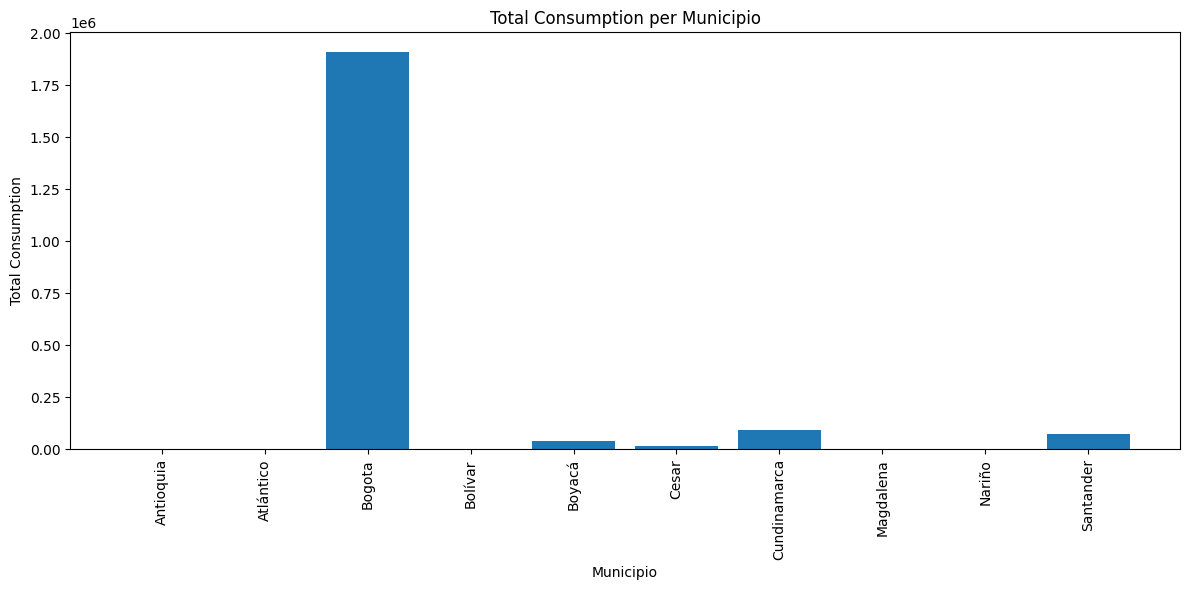

In [108]:
import matplotlib.pyplot as plt

# Assuming 'consumo' is the column representing consumption and your DataFrame is called 'df'
grouped_data = df.groupby(['DEPARTAMENTO', 'MUNICIPIO'])['consumo'].sum().reset_index()

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(grouped_data['DEPARTAMENTO'], grouped_data['consumo'])
plt.xlabel('Municipio')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per Municipio')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [128]:
df.columns

Index(['key_0', 'cuenta', 'fec_contab_documento', 'consumo',
       'categoria_cliente', 'porcion', 'dias_fact',
       'descrip_poblac_suministro', 'MUNICIPIO', 'DEPARTAMENTO'],
      dtype='object')

In [130]:
# 1. Set 'date' as index (if it's not already):
df['date'] = pd.to_datetime(df['fec_contab_documento'])
df = df.set_index('date')

In [131]:
# 2. Resample to monthly frequency and sum consumption:
monthly_consumption = df['consumo'].resample('M').sum()

In [133]:
df.columns

Index(['key_0', 'cuenta', 'fec_contab_documento', 'consumo',
       'categoria_cliente', 'porcion', 'dias_fact',
       'descrip_poblac_suministro', 'MUNICIPIO', 'DEPARTAMENTO'],
      dtype='object')

AttributeError: 'numpy.float64' object has no attribute 'plot'

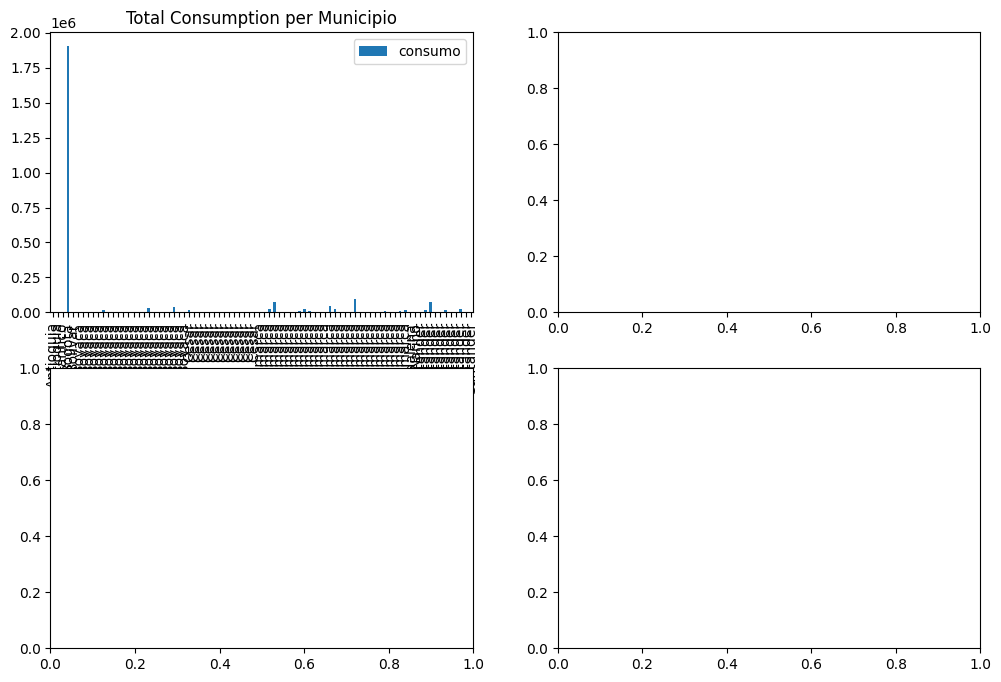

In [134]:
# prompt: help me changing the code below to add subplots

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the first graph on the first subplot
grouped_data.plot(x='DEPARTAMENTO', y='consumo', kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Total Consumption per Municipio')

# Plot the second graph on the second subplot
mean_consumo.plot(x='DEPARTAMENTO', y='consumo', kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Consumption per Municipio')

# Plot the third graph on the third subplot
df['consumo'].plot(ax=axes[1, 0])
axes[1, 0].set_title('Consumption Over Time')

# Plot the fourth graph on the fourth subplot
monthly_consumption.plot(ax=axes[1, 1])
axes[1, 1].set_title('Monthly Consumption')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


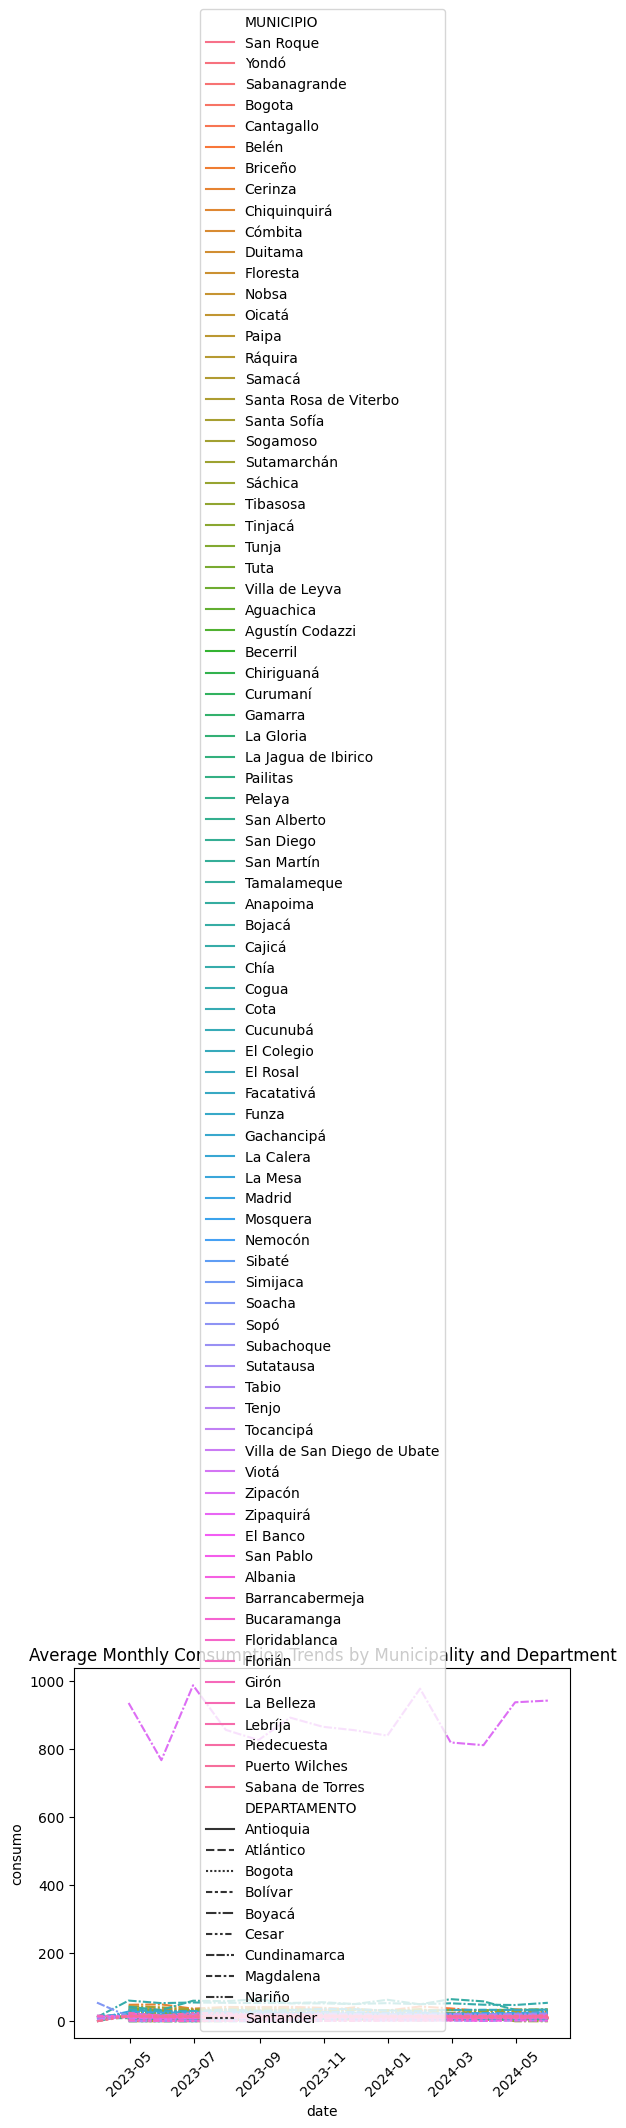

In [132]:
# Calculate average consumption per Municipio within each Departamento
average_consumption = df.groupby(['DEPARTAMENTO', 'MUNICIPIO', pd.Grouper(freq='M')])['consumo'].mean().reset_index()

# Plot the average consumption trends
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='date', y='consumo', hue='MUNICIPIO',
             style='DEPARTAMENTO', data=average_consumption)
plt.xticks(rotation=45)
plt.title('Average Monthly Consumption Trends by Municipality and Department')
plt.show()

AttributeError: Use the `.axes` attribute when facet variables are assigned.

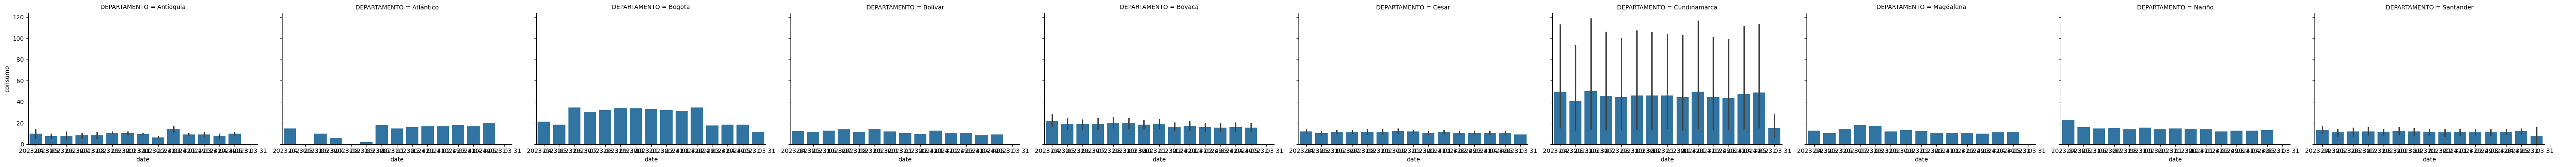

In [143]:
g=sns.catplot(
    data=average_consumption, x="date", y="consumo", col="DEPARTAMENTO",
    kind="bar", height=4, aspect=1.5,
)
ax = g.ax
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
<ipython-input-145-7b729b2fee63>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


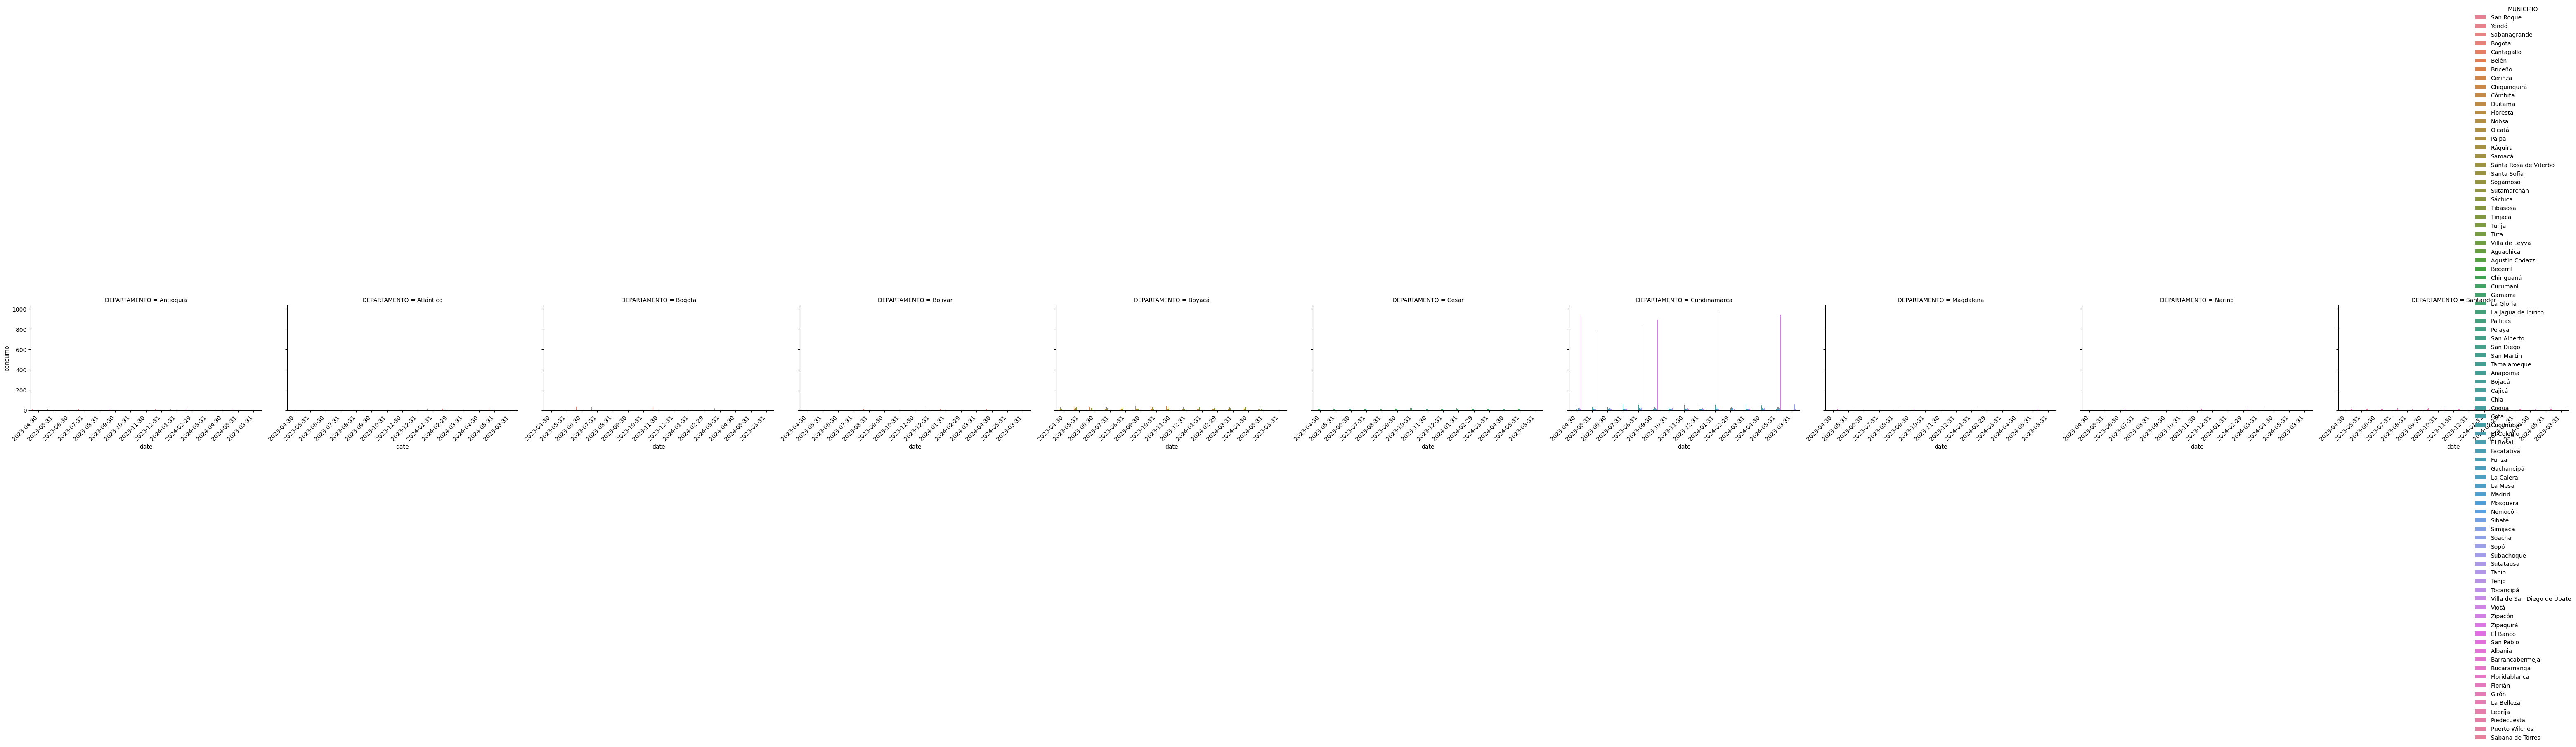

In [145]:
g=sns.catplot(
    data=average_consumption, x="date", y="consumo", col="DEPARTAMENTO",hue="MUNICIPIO",
    kind="bar", height=4, aspect=1.5,
)

# Iterate over the axes in the FacetGrid
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

<ipython-input-147-0e320fc36a22>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


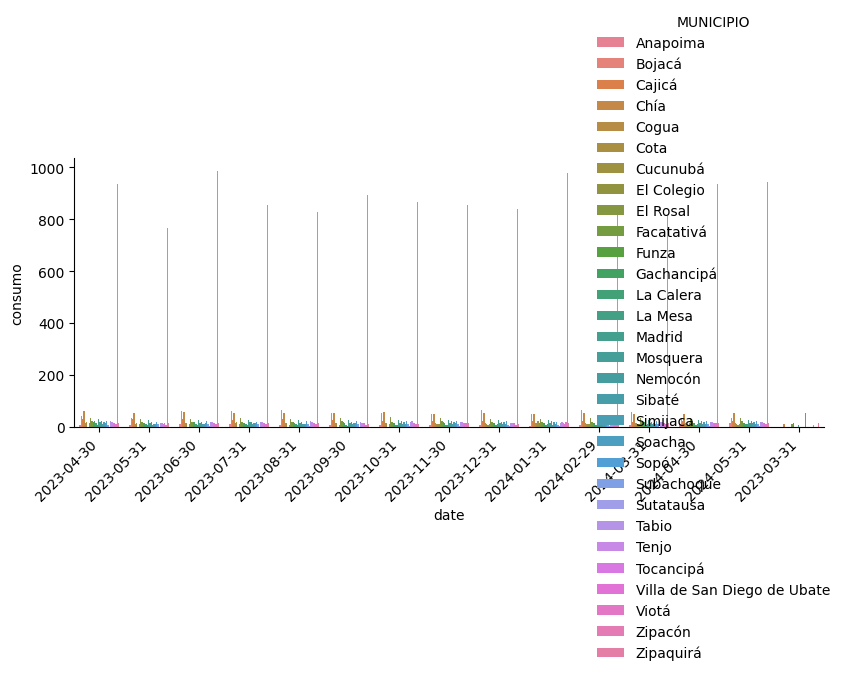

In [147]:
# Filter data for Cundinamarca department
cundinamarca_data = average_consumption[average_consumption['DEPARTAMENTO'] == 'Cundinamarca']

g = sns.catplot(
    data=cundinamarca_data, x="date", y="consumo", hue="MUNICIPIO",
    kind="bar", height=4, aspect=1.5,
)

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [105]:
grouped_data.head(10)

,key_0,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro,MUNICIPIO,DEPARTAMENTO
0,bogota,AATHHM6d7TyIT1ubMnB14A==,2023-04-22,0.0,60,P14,33,BOGOTA,Bogota,Bogota
1,bogota,AATHHM6d7TyIT1ubMnB14A==,2023-05-23,0.0,60,P14,27,BOGOTA,Bogota,Bogota
2,bogota,AATHHM6d7TyIT1ubMnB14A==,2023-06-23,0.0,60,P14,33,BOGOTA,Bogota,Bogota
3,bogota,AATHHM6d7TyIT1ubMnB14A==,2023-07-22,0.0,60,P14,27,BOGOTA,Bogota,Bogota
4,bogota,AATHHM6d7TyIT1ubMnB14A==,2023-08-23,0.0,60,P14,29,BOGOTA,Bogota,Bogota
...,...,...,...,...,...,...,...,...,...,...
99164,briceno,5sQqacG8AYzlnEzVWoBZlw==,2023-09-09,14.0,20,P04,31,BRICENO,Briceño,Boyacá
99166,briceno,5sQqacG8AYzlnEzVWoBZlw==,2023-10-09,11.0,20,P04,29,BRICENO,Briceño,Boyacá
99168,briceno,5sQqacG8AYzlnEzVWoBZlw==,2023-11-09,14.0,20,P04,32,BRICENO,Briceño,Boyacá
99170,briceno,5sQqacG8AYzlnEzVWoBZlw==,2023-12-07,16.0,20,P04,28,BRICENO,Briceño,Boyacá


In [148]:
# prompt: I wnat to select de municipes from departmanet cundinamarca that has the highet consume

# Filter data for Cundinamarca department
cundinamarca_data = df[df['DEPARTAMENTO'] == 'Cundinamarca']

# Calculate average consumption per Municipio
average_consumption = cundinamarca_data.groupby('MUNICIPIO')['consumo'].mean().reset_index()

# Sort by average consumption in descending order
average_consumption = average_consumption.sort_values(by='consumo', ascending=False)

# Select the top 5 municipios with the highest average consumption
highest_consumption_municipios = average_consumption.head(5)

# Print the results
print(highest_consumption_municipios)


   MUNICIPIO     consumo
28   Zipacón  879.142857
3       Chía   53.113240
1     Bojacá   52.274247
8   El Rosal   32.856459
14    Madrid   25.850839


In [151]:
df[df.MUNICIPIO=='Zipacón']

,key_0,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro,MUNICIPIO,DEPARTAMENTO
date,,,,,,,,,,
2023-04-25,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-04-25,935.0,80,P16,31,ZIPACON,Zipacón,Cundinamarca
2023-05-25,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-05-25,767.0,80,P16,27,ZIPACON,Zipacón,Cundinamarca
2023-06-26,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-06-26,987.0,80,P16,32,ZIPACON,Zipacón,Cundinamarca
2023-07-25,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-07-25,856.0,80,P16,28,ZIPACON,Zipacón,Cundinamarca
2023-08-25,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-08-25,826.0,80,P16,28,ZIPACON,Zipacón,Cundinamarca
2023-09-25,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-09-25,892.0,80,P16,31,ZIPACON,Zipacón,Cundinamarca
2023-10-25,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-10-25,865.0,80,P16,31,ZIPACON,Zipacón,Cundinamarca
2023-11-24,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-11-24,855.0,80,P16,30,ZIPACON,Zipacón,Cundinamarca
2023-12-23,zipacon,dgE8SAn4l8t7EuG40uci4Q==,2023-12-23,839.0,80,P16,28,ZIPACON,Zipacón,Cundinamarca


In [177]:
with pd.option_context('display.max_rows', None):
    display(df.groupby('DEPARTAMENTO')['cuenta'].nunique())

DEPARTAMENTO
Antioquia          5
Atlántico          1
Bogota          4991
Bolívar            3
Boyacá           469
Cesar            223
Cundinamarca    1462
Magdalena         26
Nariño            17
Santander        775
Name: cuenta, dtype: int64

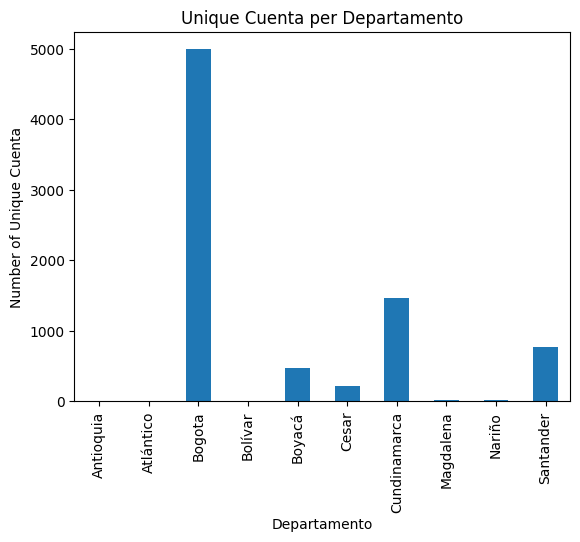

In [179]:
import matplotlib.pyplot as plt
result = df.groupby('DEPARTAMENTO')['cuenta'].nunique()
result.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Number of Unique Cuenta')
plt.title('Unique Cuenta per Departamento')
plt.show()

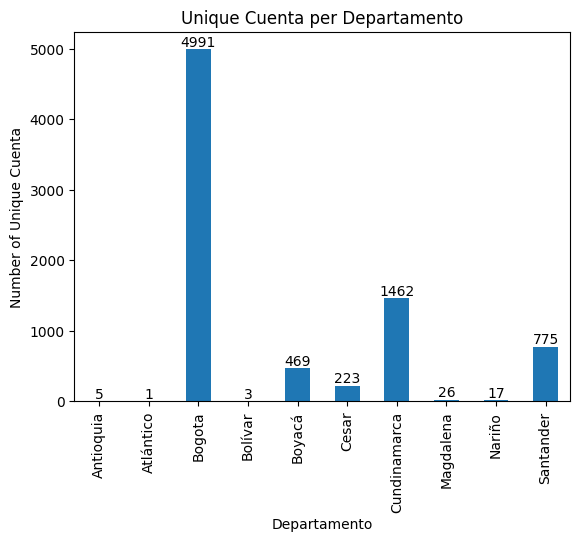

In [180]:
import matplotlib.pyplot as plt

result.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Number of Unique Cuenta')
plt.title('Unique Cuenta per Departamento')

# Add value labels to each bar
for i, v in enumerate(result):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

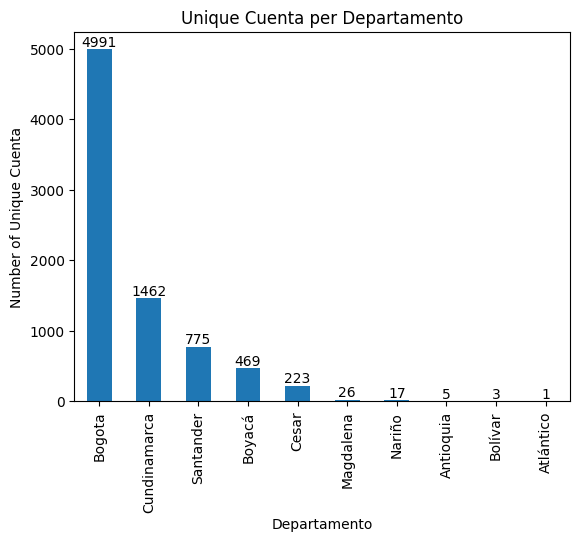

In [181]:
import matplotlib.pyplot as plt

# Sort the result Series in descending order
result_sorted = result.sort_values(ascending=False)

result_sorted.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Number of Unique Cuenta')
plt.title('Unique Cuenta per Departamento')

# Add value labels to each bar
for i, v in enumerate(result_sorted):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

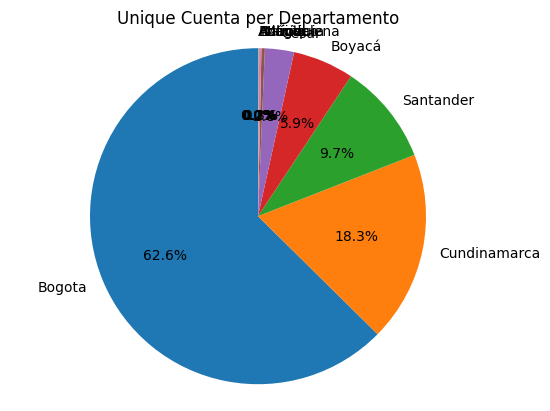

In [182]:
import matplotlib.pyplot as plt

# Sort the result Series in descending order (optional)
result_sorted = result.sort_values(ascending=False)

# Create the pie chart
plt.pie(result_sorted, labels=result_sorted.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Unique Cuenta per Departamento')

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()

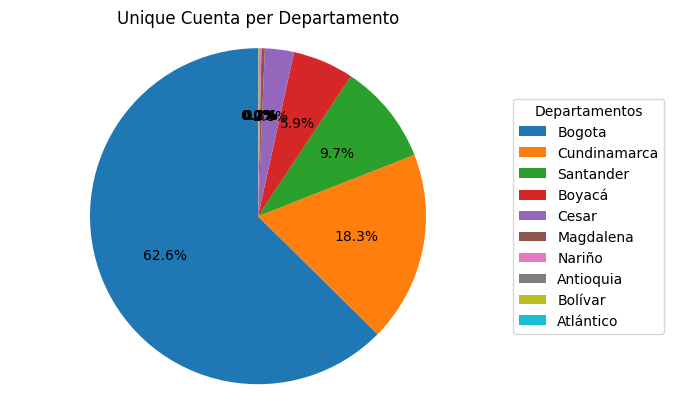

In [192]:
import matplotlib.pyplot as plt

# Sort the result Series in descending order (optional)
result_sorted = result.sort_values(ascending=False)

# Create the pie chart
plt.pie(result_sorted, labels=None, autopct='%1.1f%%', startangle=90)  # Remove labels from slices

# Add a title
plt.title('Unique Cuenta per Departamento')

# Ensure the circle's proportion
plt.axis('equal')

# Create a legend with customized appearance
plt.legend(result_sorted.index,
           title="Departamentos",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))  # Place legend outside the pie chart

# Display the chart
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

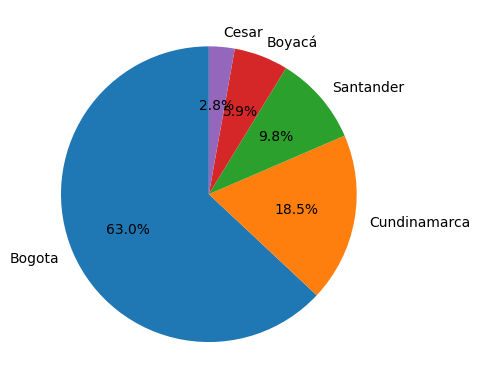

In [193]:
import matplotlib.pyplot as plt

# Sort the result Series in descending order and take the top 5
top_5_result = result.sort_values(ascending=False).head(5)

# Create the pie chart
plt.pie(top_5_result, labels=top_5_result.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title

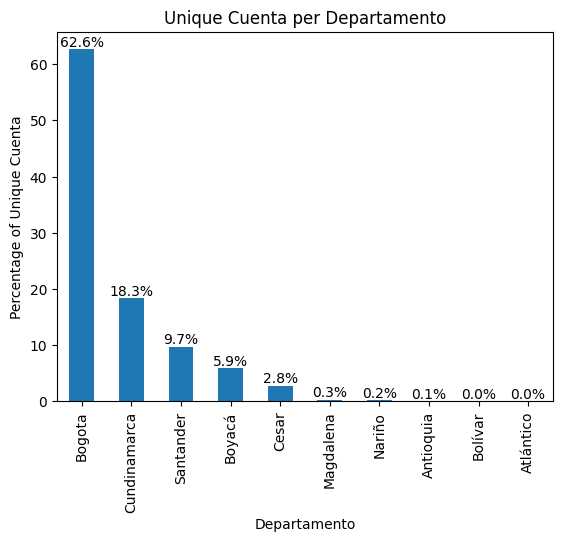

In [183]:
import matplotlib.pyplot as plt

# Sort the result Series in descending order (optional)
result_sorted = result.sort_values(ascending=False)

# Calculate percentages
total = result_sorted.sum()
percentages = (result_sorted / total) * 100

# Create the bar plot
ax = percentages.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Percentage of Unique Cuenta')
plt.title('Unique Cuenta per Departamento')

# Add value labels with percentages to each bar
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

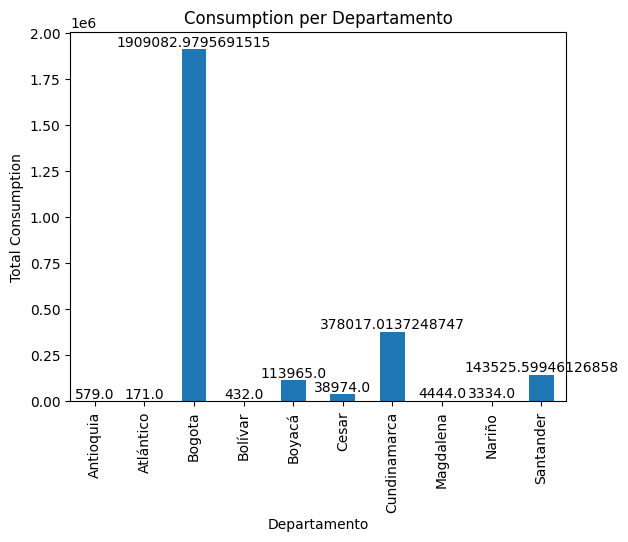

In [186]:
import matplotlib.pyplot as plt

# Calculate the sum of consume per departamento
consume_per_departamento = df.groupby('DEPARTAMENTO')['consumo'].sum()

# Create the bar chart
consume_per_departamento.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Total Consumption')
plt.title('Consumption per Departamento')

# Add value labels to each bar (optional)
for i, v in enumerate(consume_per_departamento):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [187]:
# prompt: display all rowas

with pd.option_context('display.max_rows', None):
    display(consume_per_departamento)


DEPARTAMENTO
Antioquia       5.790000e+02
Atlántico       1.710000e+02
Bogota          1.909083e+06
Bolívar         4.320000e+02
Boyacá          1.139650e+05
Cesar           3.897400e+04
Cundinamarca    3.780170e+05
Magdalena       4.444000e+03
Nariño          3.334000e+03
Santander       1.435256e+05
Name: consumo, dtype: float64

In [188]:
df.MUNICIPIO.value_counts()

MUNICIPIO
Bogota             68308
Soacha              7422
Bucaramanga         5130
Tunja               2124
Barrancabermeja     1735
                   ...  
Floresta              14
Florián               14
Sutamarchán           14
Briceño               14
Oicatá                12
Name: count, Length: 84, dtype: int64

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Create a synthetic dataset with two moon-shaped clusters
#X, _ = make_moons(n_samples=300, noise=0.6, random_state=42)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df)

# Get cluster labels (-1 indicates anomalies)
labels = dbscan.labels_

# Separate data points into clusters and anomalies
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot the clusters and anomalies
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for anomalies
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}\nEstimated number of anomalies: {n_noise_}')
plt.show()

ValueError: could not convert string to float: 'AATHHM6d7TyIT1ubMnB14A=='

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame with mixed data types
# Select only the numerical columns for clustering
filtered_df = df[df['descrip_poblac_suministro'] == 'BOGOTA']
filtered_df = filtered_df[filtered_df['categoria_cliente'] < 80]
filtered_df = filtered_df.drop('dias_fact', axis=1)
numerical_df = filtered_df.select_dtypes(include=['number'])

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(numerical_df)

# Get cluster labels (-1 indicates anomalies)
labels = dbscan.labels_


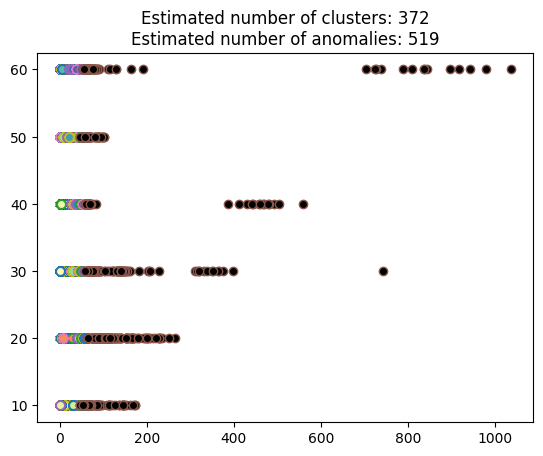

In [47]:
# Separate data points into clusters and anomalies
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot the clusters and anomalies
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for anomalies
    class_member_mask = (labels == k)
    # Use numerical_df instead of X for plotting
    xy = numerical_df.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)
    xy = numerical_df.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}\nEstimated number of anomalies: {n_noise_}')
plt.show()

In [48]:
filtered_df.describe()

,consumo,categoria_cliente
count,66747.000000,66747.000000
mean,14.416933,27.899231
std,20.169786,11.144087
min,0.000000,10.000000
25%,5.000000,20.000000
50%,11.000000,30.000000
75%,19.000000,30.000000
max,1037.000000,60.000000


In [49]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with mixed data types
# Select relevant columns for clustering (adjust as needed)
relevant_cols = ['consumo', 'categoria_cliente', 'descrip_poblac_suministro']
df_subset = df[relevant_cols]

# Preprocess categorical features (one-hot encoding)
df_encoded = pd.get_dummies(df_subset, columns=['descrip_poblac_suministro'])

# Standardize numerical features
scaler = StandardScaler()
df_encoded[['consumo', 'categoria_cliente']] = scaler.fit_transform(df_encoded[['consumo', 'categoria_cliente']])

# Define a custom distance metric
def mixed_distance(x, y):
    num_cols = ['consumo', 'categoria_cliente']
    cat_cols = [col for col in df_encoded.columns if col not in num_cols]

    # Numerical distance (Euclidean)
    num_dist = np.linalg.norm(x[num_cols] - y[num_cols])

    # Categorical distance (simple matching)
    cat_dist = np.sum(x[cat_cols] != y[cat_cols])

    # Combine distances (adjust weights as needed)
    return num_dist + 0.5 * cat_dist

# Calculate pairwise distances using the custom metric
distance_matrix = pairwise_distances(df_encoded, metric=mixed_distance)

# Apply DBSCAN with the custom distance matrix
dbscan = DBSCAN(eps=1, min_samples=5, metric='precomputed')  # Adjust eps and min_samples as needed
dbscan.fit(distance_matrix)

# Get cluster labels
labels = dbscan.labels_
print(labels)

# Add cluster labels to the original DataFrame
df['cluster'] = labels
print(df.head())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler


# Select relevant columns for clustering (adjust as needed)
relevant_cols = ['consumo', 'categoria_cliente', 'descrip_poblac_suministro']
df_subset = df[relevant_cols]

# Preprocess categorical features (one-hot encoding)
df_encoded = pd.get_dummies(df_subset, columns=['descrip_poblac_suministro'])

# Standardize numerical features
scaler = StandardScaler()
df_encoded[['consumo', 'categoria_cliente']] = scaler.fit_transform(df_encoded[['consumo', 'categoria_cliente']])

# Define a custom distance metric
def mixed_distance(x, y):
    num_cols = ['consumo', 'categoria_cliente']
    cat_cols = [col for col in df_encoded.columns if col not in num_cols]

    # Numerical distance (Euclidean)
    # Extract numerical values using column indices
    x_num = x[df_encoded.columns.get_indexer(num_cols)]
    y_num = y[df_encoded.columns.get_indexer(num_cols)]
    num_dist = np.linalg.norm(x_num - y_num)

    # Categorical distance (simple matching)
    x_cat = x[df_encoded.columns.get_indexer(cat_cols)]
    y_cat = y[df_encoded.columns.get_indexer(cat_cols)]
    cat_dist = np.sum(x_cat != y_cat)

    # Combine distances (adjust weights as needed)
    return num_dist + 0.5 * cat_dist

# Calculate pairwise distances using the custom metric
distance_matrix = pairwise_distances(df_encoded.values, metric=mixed_distance) # Pass the underlying NumPy array

# Apply DBSCAN with the custom distance matrix
dbscan = DBSCAN(eps=1, min_samples=5, metric='precomputed')  # Adjust eps and min_samples as needed
dbscan.fit(distance_matrix)

# Get cluster labels
labels = dbscan.labels_
print(labels)

# Add cluster labels to the original DataFrame
df['cluster'] = labels
print(df.head())

KeyboardInterrupt: 